In [67]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1: Data Preparation and Exploration

#### 1.	Data Loading

In [5]:
# Load dataset
data=pd.read_csv('C:\\Users\\hp\\Desktop\\EXCELR\\EXCELR\\Timeseries\\exchange_rate.csv')
data.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [7]:
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y %H:%M')

# Set 'date_column' as index
data.set_index('date', inplace=True)
data.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849


In [9]:
data.shape

(7588, 1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB


#### 2.	Initial Exploration

<Axes: xlabel='date'>

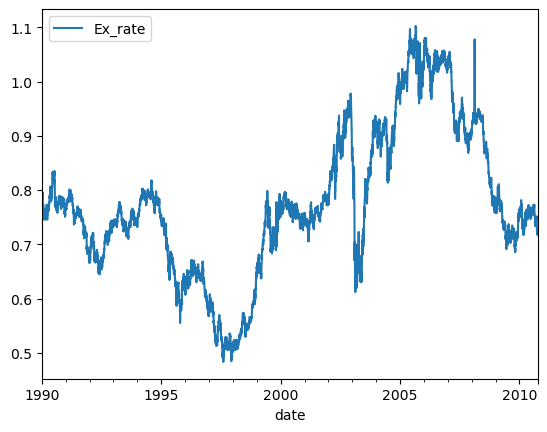

In [13]:
data.plot()

array([[<Axes: title={'center': 'Ex_rate'}>]], dtype=object)

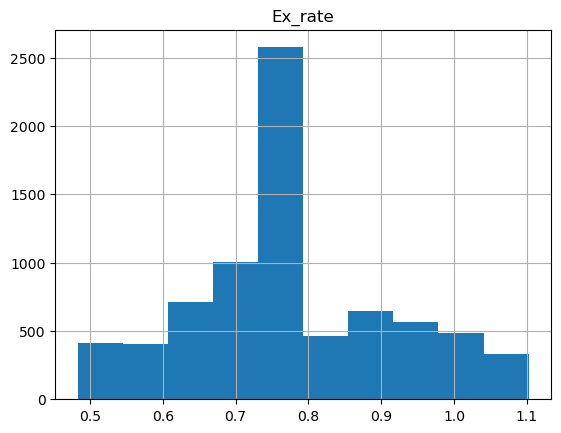

In [15]:
data.hist()

<Axes: ylabel='Density'>

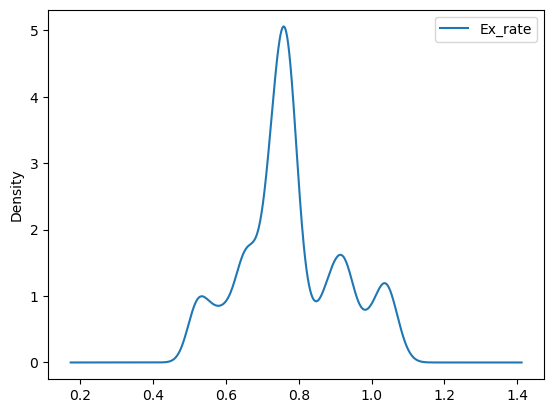

In [17]:
data.plot(kind='kde')

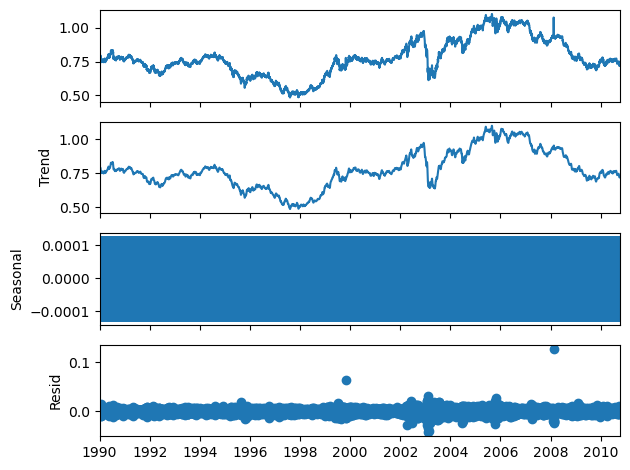

In [19]:
decompose=seasonal_decompose(data,model='additive')
decompose.plot()
plt.show()

##### 3. Data Preprocessing

In [21]:
train=data.head(6858)
test=data.tail(730)

In [23]:
print(train.shape,test.shape)

(6858, 1) (730, 1)


# 2: Model Building - ARIMA

### 1.	Parameter Selection for ARIMA

#### ACF and PACF plots 

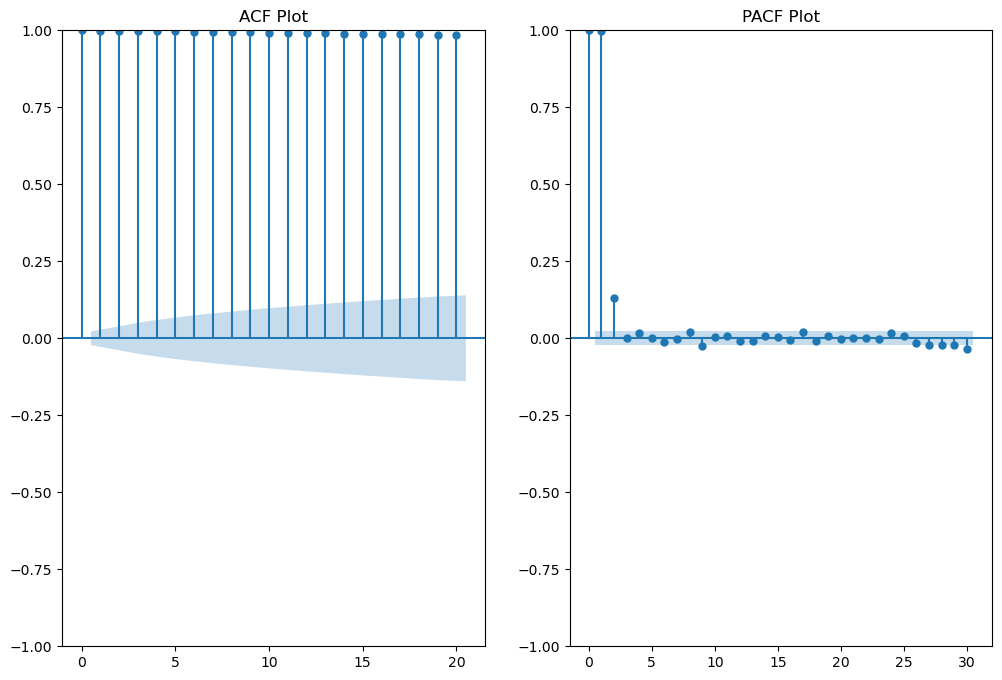

In [25]:
plt.figure(figsize=(12, 8))
plt.subplot(121)
plot_acf(data, ax=plt.gca(), lags=20)
plt.title('ACF Plot')
plt.subplot(122)
plot_pacf(data, ax=plt.gca(), lags=30)
plt.title('PACF Plot')

plt.show()

### 2.	Model Fitting

In [27]:
model= ARIMA(train,order=(1,1,1))
model_fit=model.fit()

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [29]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 6858
Model:                 ARIMA(1, 1, 1)   Log Likelihood               25225.034
Date:                Fri, 30 Aug 2024   AIC                         -50444.067
Time:                        10:38:47   BIC                         -50423.568
Sample:                    01-01-1990   HQIC                        -50436.996
                         - 10-10-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1265      0.046     -2.738      0.006      -0.217      -0.036
ma.L1         -0.0076      0.046     -0.163      0.870      -0.098       0.083
sigma2      3.734e-05   1.07e-07    347.848      0.0

### 3.	Diagnostics

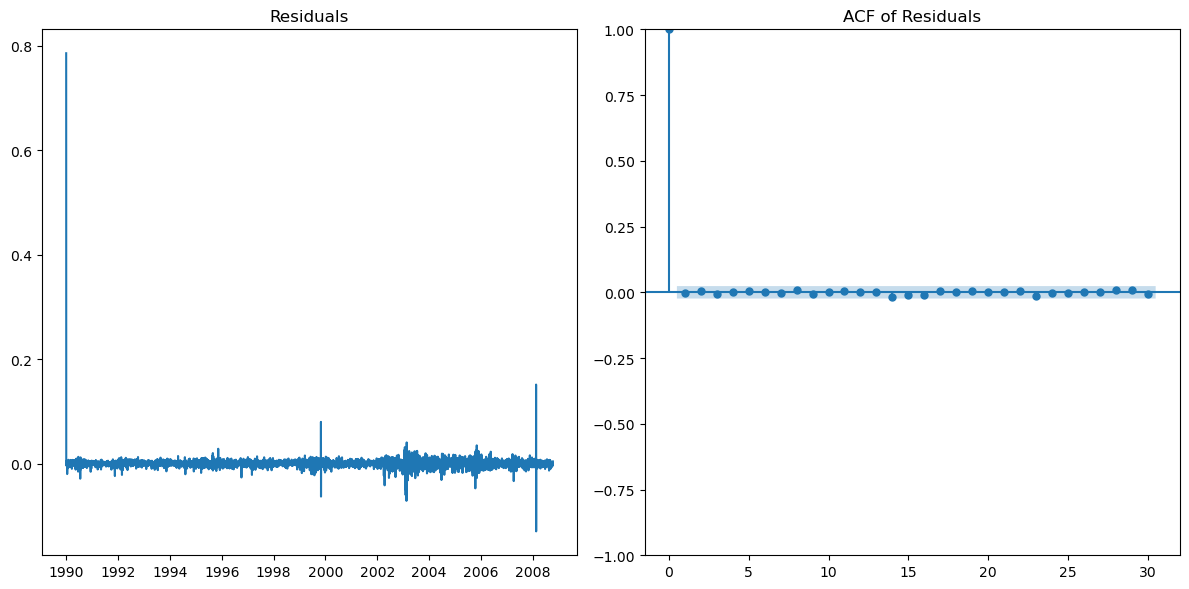

In [31]:
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(residuals)
plt.title('Residuals')

plt.subplot(1, 2, 2)
plot_acf(residuals, lags=30, ax=plt.gca())
plt.title('ACF of Residuals')

plt.tight_layout()
plt.show()

### 4.	Forecasting

In [33]:
test

,Ex_rate
date,
2008-10-11,0.820008
2008-10-12,0.808931
2008-10-13,0.808931
2008-10-14,0.809520
2008-10-15,0.811524
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


In [35]:
pred_test=model_fit.forecast(steps=len(test))
pred_test

2008-10-11    0.814311
2008-10-12    0.814381
2008-10-13    0.814372
2008-10-14    0.814373
2008-10-15    0.814373
                ...   
2010-10-06    0.814373
2010-10-07    0.814373
2010-10-08    0.814373
2010-10-09    0.814373
2010-10-10    0.814373
Freq: D, Name: predicted_mean, Length: 730, dtype: float64

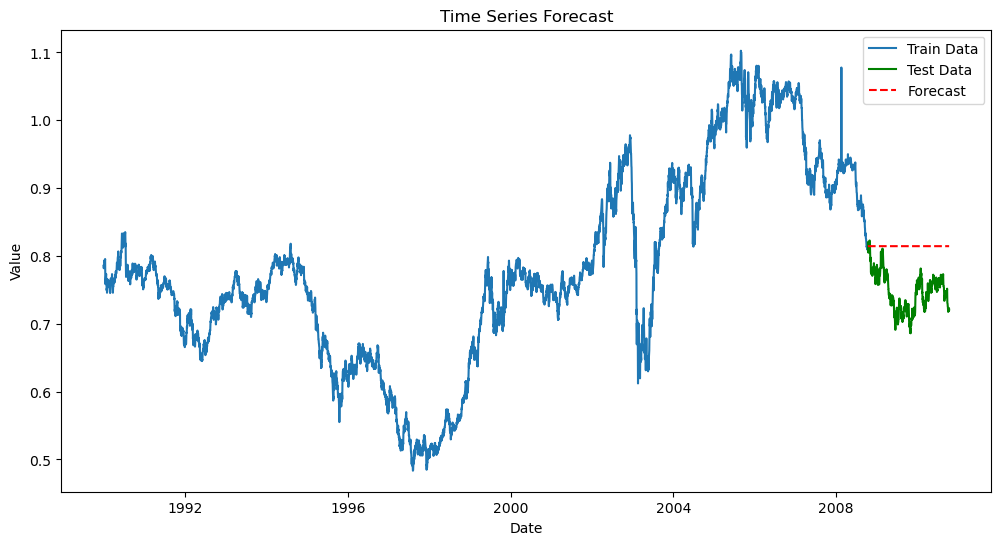

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Data')
plt.plot(test, label='Test Data', color='green')
plt.plot(pred_test, label='Forecast', color='red', linestyle='--')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Forecast')
plt.legend()
plt.show()

# 3. Model Building - Exponential Smoothing

### Simple Exponential Method

In [39]:
model_exp = SimpleExpSmoothing(train).fit(smoothing_level=0.1)

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [41]:
print(model_exp.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                Ex_rate   No. Observations:                 6858
Model:             SimpleExpSmoothing   SSE                              1.068
Optimized:                      False   AIC                         -60125.524
Trend:                           None   BIC                         -60111.858
Seasonal:                        None   AICC                        -60125.518
Seasonal Periods:                None   Date:                 Fri, 30 Aug 2024
Box-Cox:                        False   Time:                         10:39:20
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1000000                alpha                False
initial_level              0.7855000                

In [57]:
forecast=model_exp.forecast(steps=len(test))
forecast

2008-10-11    0.818158
2008-10-12    0.818158
2008-10-13    0.818158
2008-10-14    0.818158
2008-10-15    0.818158
                ...   
2010-10-06    0.818158
2010-10-07    0.818158
2010-10-08    0.818158
2010-10-09    0.818158
2010-10-10    0.818158
Freq: D, Length: 730, dtype: float64

### Holt method

In [43]:
# Holt method 
model_holt = Holt(train).fit(smoothing_level=0.8,smoothing_slope=0.1)

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Local\Temp\ipykernel_16028\548042077.py:2: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_holt = Holt(train).fit(smoothing_level=0.8,smoothing_slope=0.1)
C:\Users\hp\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [45]:
print(model_holt.summary())

                              Holt Model Results                              
Dep. Variable:                Ex_rate   No. Observations:                 6858
Model:                           Holt   SSE                              0.269
Optimized:                      False   AIC                         -69576.323
Trend:                       Additive   BIC                         -69548.990
Seasonal:                        None   AICC                        -69576.311
Seasonal Periods:                None   Date:                 Fri, 30 Aug 2024
Box-Cox:                        False   Time:                         10:39:31
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8000000                alpha                False
smoothing_trend            0.1000000                

In [47]:
forecast1=model_holt.forecast(steps=len(test))
forecast1

2008-10-11    0.813362
2008-10-12    0.812904
2008-10-13    0.812446
2008-10-14    0.811988
2008-10-15    0.811530
                ...   
2010-10-06    0.481254
2010-10-07    0.480795
2010-10-08    0.480337
2010-10-09    0.479879
2010-10-10    0.479421
Freq: D, Length: 730, dtype: float64

### Holts winter exponential smoothing

In [49]:
model_winter= ExponentialSmoothing(train,seasonal="add",trend="add",seasonal_periods=24).fit() 

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [51]:
print(model_winter.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 6858
Model:             ExponentialSmoothing   SSE                              0.255
Optimized:                         True   AIC                         -69881.537
Trend:                         Additive   BIC                         -69690.209
Seasonal:                      Additive   AICC                        -69881.265
Seasonal Periods:                    24   Date:                 Fri, 30 Aug 2024
Box-Cox:                          False   Time:                         10:39:44
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8677372                alpha                 True
smoothing_trend          

In [53]:
forecast2=model_winter.forecast(steps=len(test))
forecast2

2008-10-11    0.813914
2008-10-12    0.814272
2008-10-13    0.814692
2008-10-14    0.814745
2008-10-15    0.814747
                ...   
2010-10-06    0.818550
2010-10-07    0.818962
2010-10-08    0.818947
2010-10-09    0.818721
2010-10-10    0.819209
Freq: D, Length: 730, dtype: float64

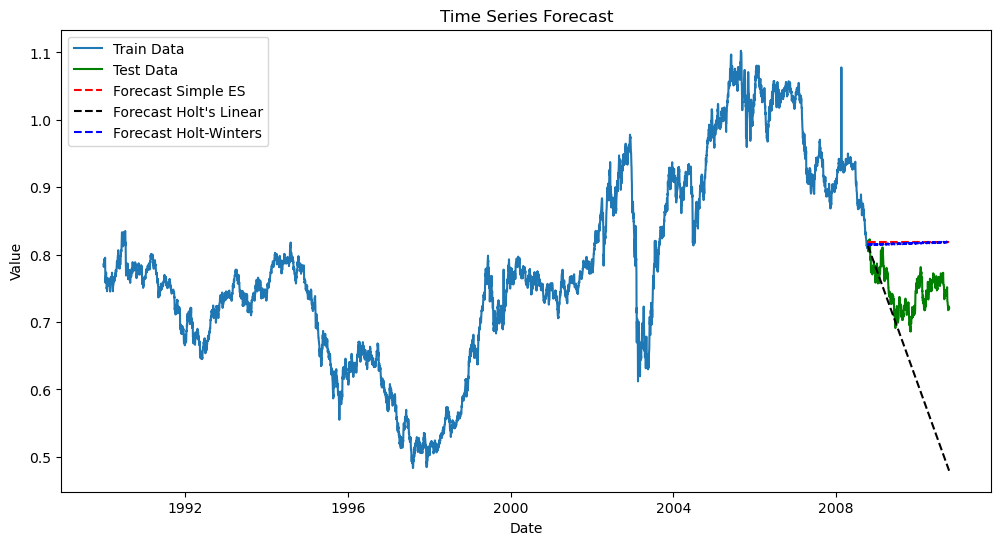

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Data')
plt.plot(test, label='Test Data', color='green')
plt.plot(forecast, label='Forecast Simple ES', color='red', linestyle='--')
plt.plot(forecast1, label='Forecast Holt\'s Linear', color='black', linestyle='--')
plt.plot(forecast2, label='Forecast Holt-Winters', color='blue', linestyle='--')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Forecast')
plt.legend()
plt.show()

# 4: Evaluation and Comparison

In [73]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_indices = y_true != 0
    return np.mean(np.abs((y_true- y_pred) / y_true)) * 100

def compute_metrics(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mape = mean_absolute_percentage_error(actual, forecast)
    return mae, rmse, mape

In [75]:
mae_ses, rmse_ses, mape_ses = compute_metrics(test, forecast)
mae_holt, rmse_holt, mape_holt = compute_metrics(test, forecast1)
mae_hw, rmse_hw, mape_hw = compute_metrics(test, forecast2)
mae_arima, rmse_arima, mape_arima = compute_metrics(test, pred_test)

In [77]:
print(f"Simple Exponential Smoothing - MAE: {mae_ses:.2f}, RMSE: {rmse_ses:.2f}, MAPE: {mape_ses:.2f}%")
print(f"Holt's Linear Trend Model - MAE: {mae_holt:.2f}, RMSE: {rmse_holt:.2f}, MAPE: {mape_holt:.2f}%")
print(f"Holt-Winters Model - MAE: {mae_hw:.2f}, RMSE: {rmse_hw:.2f}, MAPE: {mape_hw:.2f}%")
print(f"ARIMA Model - MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}, MAPE: {mape_arima:.2f}%")

Simple Exponential Smoothing - MAE: 0.07, RMSE: 0.08, MAPE: 9.55%
Holt's Linear Trend Model - MAE: 0.10, RMSE: 0.14, MAPE: 15.55%
Holt-Winters Model - MAE: 0.07, RMSE: 0.07, MAPE: 9.36%
ARIMA Model - MAE: 0.07, RMSE: 0.07, MAPE: 9.06%
